In [29]:
# Adaptation of kernel
# https://www.kaggle.com/jeetranjeet619/titanic-dataset-play-around-in-r/code
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

train['train_set'] = True
test['train_set'] = False

df = pd.concat([train, test], sort=True)

del train, test

In [3]:
df['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

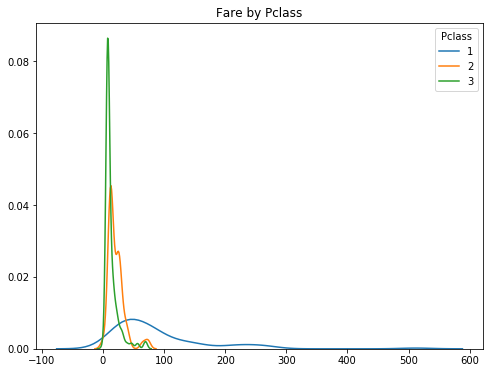

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(1, 4):
    ax = sns.kdeplot(
        df[(df['Pclass'] == i) & 
           (df['Fare'].notnull())]['Fare'].values, 
        label=str(i), ax=ax)

plt.legend(title='Pclass')
plt.title("Fare by Pclass")
plt.show()

In [5]:
# There is NAs in the data set. 
# Fare patching
assert 152 == df[df['Fare'].isna()].index.values[0]
df.loc[152, 'Fare'] = df[(df['Pclass'] == 3) &
                         (df['Embarked'] == 'S')].Fare.median()

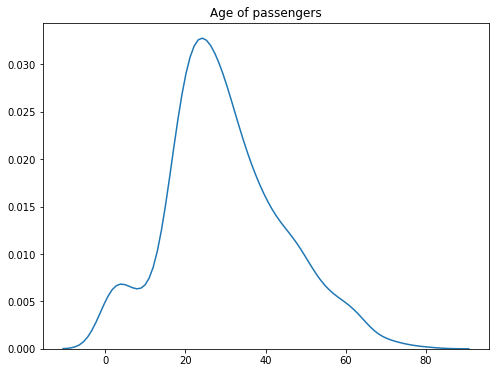

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.kdeplot(df[df['Age'].notnull()]['Age'].values, ax=ax)

plt.title("Age of passengers")
plt.show()

In [7]:
# Age patching
df.loc[df['Age'].isnull(), 'Age'] = df['Age'].median()

In [8]:
# Cabin. Not well populated so drop
df.drop(columns='Cabin', inplace=True)

In [9]:
# There are two observations where the Embarked value is missing.
# We will impute them with the 'S' for the corresponding
# Pclass (1)
df[df['Embarked'].isnull()] = 'S'

# Feature Engineering
## Titles

In [26]:
# Create one-hot encoding for titles, skipping rare titles
titles = ['mr.', 'mrs.', 'miss', 'master.']

features = []
for t in titles:
    df['title_{}'.format(t.replace(".", ""))] = np.where(
        df['Name'].apply(lambda x: t in str(x).lower()), 1, 0)

    df.loc[df['Name'].apply(lambda x: t in str(x).lower()), 'title'] = t
    
    features.append('title_{}'.format(t.replace(".", "")))
    
df['Name'].fillna("Rare", inplace=True)

In [27]:
df[[c for c in df.columns if "title_" in c]].sum()

title_mr        757
title_mrs       196
title_miss      259
title_master     61
dtype: int64

## Surname

In [28]:
df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,train_set,title_mr,title_mrs,title_miss,title_master,title
0,22,S,7.25,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,True,1,0,0,0,mr.
1,38,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,True,0,1,0,0,mrs.
2,26,S,7.925,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,True,0,0,1,0,miss
3,35,S,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,True,0,1,0,0,mrs.
4,35,S,8.05,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,True,1,0,0,0,mr.
